In [2]:
import cPickle
import numpy as np
import mxnet as mx
import matplotlib.pyplot as plt
import PIL.Image as Image

In [3]:
color = (np.random.randint(0, 255), np.random.randint(0, 255), np.random.randint(0, 255))

In [4]:
data_file = '/mnt/truenas/scratch/siyu/keypoint_maskrcnn/debug/onesample/data0.pkl'
label_file = '/mnt/truenas/scratch/siyu/keypoint_maskrcnn/debug/onesample/label0.pkl'
data = cPickle.load(open(data_file, 'r'))
label = cPickle.load(open(label_file, 'r'))

In [5]:
im = data[0].asnumpy()[0]
im = im.transpose((1,2,0))
im = im.astype(np.uint8)

In [6]:
im.shape

(800, 1333, 3)

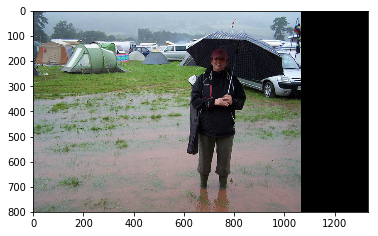

In [7]:
plt.imshow(im)

In [8]:
roi1 = data[1].asnumpy()[0][:,1:]
roi2 = data[2].asnumpy()[0][:,1:]
roi3 = data[3].asnumpy()[0][:,1:]
roi4 = data[4].asnumpy()[0][:,1:]
roi = roi1 + roi2 + roi3 + roi4
print roi.shape

(256, 4)


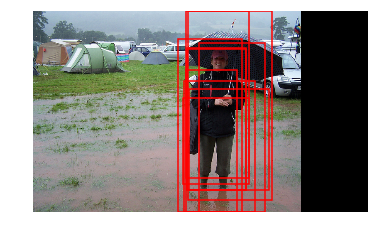

In [14]:
plt.imshow(im)

for i in range(10):
    bbox = roi[i]
    linewidth = 1.5
    color = 'r'
    bbox = roi[i]
    rect = plt.Rectangle((bbox[0], bbox[1]),
                         bbox[2] - bbox[0],
                         bbox[3] - bbox[1], fill=False,
                         edgecolor=color, linewidth=linewidth)
    plt.gca().add_patch(rect)

plt.axis('off')
plt.show()

In [9]:
keypoints = label[3].asnumpy()[0]
print keypoints.shape

(64, 17, 28, 28)


In [39]:
def get_skeletons():
    skeletons = [[15, 13],
                [13, 11],
                [16, 14],
                [14, 12],
                [11, 12],
                [5, 11],
                [6, 12],
                [5, 6],
                [5, 7],
                [6, 8],
                [7, 9],
                [8, 10],
                [1, 2],
                [0, 1],
                [0, 2],
                [1, 3],
                [2, 4],
                [3, 5],
                [4, 6]]
    return skeletons

In [10]:
def get_keypoint_wrt_box(x_coord, y_coord, bbox):
    x = bbox[0] + float(x_coord) / 28.0 * (bbox[2] - bbox[0])
    y = bbox[1] + float(y_coord) / 28.0 * (bbox[3] - bbox[1])
    return x, y

736 ,
189 ,
1 ,
745 ,
189 ,
1 ,
720 ,
189 ,
1 ,
761 ,
189 ,
1 ,
703 ,
189 ,
1 ,
786 ,
249 ,
1 ,
669 ,
249 ,
1 ,
828 ,
330 ,
1 ,
644 ,
350 ,
1 ,
795 ,
350 ,
1 ,
711 ,
350 ,
1 ,
761 ,
471 ,
1 ,
678 ,
471 ,
1 ,
753 ,
612 ,
1 ,
678 ,
612 ,
1 ,
753 ,
693 ,
1 ,
611 ,
149 ,
1 ,


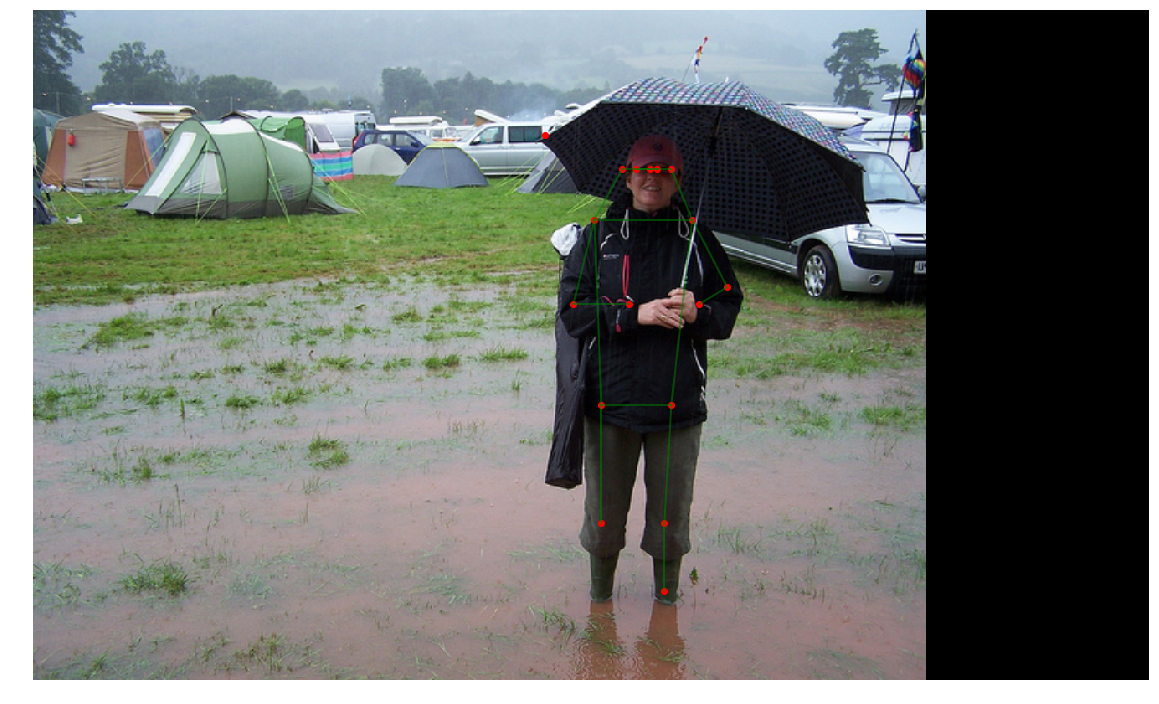

In [47]:
plt.figure(figsize=(20,30))
plt.imshow(im)

for i in range(1):
    bbox = roi[i]
    kps_heatmap_single = keypoints[i]
    xs = np.zeros(17)
    ys = np.zeros(17)
    for k in range(kps_heatmap_single.shape[0]):
        xtemp, ytemp = np.unravel_index(kps_heatmap_single[k].argmax(), kps_heatmap_single[k].shape)
        xs[k], ys[k] = get_keypoint_wrt_box(xtemp, ytemp, bbox)
        plt.plot(xs[k], ys[k], 'o', color=color)
    for k in range(17):
        print int(xs[k]), ","
        print int(ys[k]), ","
        print 1, ","
    skeletons = get_skeletons()
    for sk in skeletons:
#         print xs[sk[0]], ys[sk[0]]
        if (int(xs[sk[0]]) == int(bbox[0]) and int(ys[sk[0]]) == int(bbox[1])) or (int(xs[sk[1]]) == int(bbox[0]) and int(ys[sk[1]]) == int(bbox[1])):
            continue
        plt.plot(xs[sk], ys[sk], linewidth=2, color='g', alpha=0.5)

plt.axis('off')
plt.show()

In [44]:
keypoints.shape

(64, 17, 28, 28)

In [17]:
label[0].sum()


[10.]
<NDArray 1 @cpu(0)>

In [19]:
roi[0:10]

array([[611.5333 , 149.25   , 845.3333 , 713.2167 ],
       [611.6073 , 149.40536, 845.2664 , 713.0785 ],
       [602.32855, 278.61548, 884.0214 , 799.     ],
       [608.7298 ,   0.     , 858.2591 , 663.05396],
       [658.6182 , 127.88217, 924.75977, 799.     ],
       [608.90515, 235.50232, 812.4495 , 799.     ],
       [618.6973 , 310.95074, 937.96594, 711.427  ],
       [598.1514 , 346.0213 , 858.99146, 690.0395 ],
       [577.49866, 110.25702, 830.12714, 799.     ],
       [617.69635,   0.     , 950.2265 , 753.1098 ]], dtype=float32)

In [275]:
bbox_target = data[1].asnumpy()[0]

In [277]:
bbox_target[100:200]

array([[  0.       ,   0.       ,   0.       ,   0.       ,   0.       ],
       [  0.       ,   0.       ,   0.       ,   0.       ,   0.       ],
       [  0.       ,   0.       ,   0.       ,   0.       ,   0.       ],
       [  0.       ,   0.       ,   0.       ,   0.       ,   0.       ],
       [  0.       ,   0.       ,   0.       ,   0.       ,   0.       ],
       [  0.       ,   0.       ,   0.       ,   0.       ,   0.       ],
       [  0.       ,   0.       ,   0.       ,   0.       ,   0.       ],
       [  0.       ,   0.       ,   0.       ,   0.       ,   0.       ],
       [  0.       ,  -1.6822796, 235.55911  , 495.00177  , 799.       ],
       [  0.       ,   0.       ,   0.       ,   0.       ,   0.       ],
       [  0.       ,   0.       ,   0.       ,   0.       ,   0.       ],
       [  0.       ,   0.       ,   0.       ,   0.       ,   0.       ],
       [  0.       ,   0.       ,   0.       ,   0.       ,   0.       ],
       [  0.       ,   0.       ,   0.